# Turbo Stage Example


In [1]:
import numpy as np
from parafoil import TurboRowPassage, TurboStagePassage, TurboMeshParameters
from parafoil import CamberThicknessAirfoil

rotor_airfoil = CamberThicknessAirfoil(
    inlet_angle=np.radians(-60),
    outlet_angle=np.radians(-51),
    upper_thick_prop=[0.015, 0.05, 0.05  , 0.015],
    lower_thick_prop=[0.015, 0.05, 0.05, 0.015],
    leading_prop=0.5,
    trailing_prop=0.5,
    chord_length=0.018,
)

stator_airfoil = CamberThicknessAirfoil(
    inlet_angle=np.radians(26),
    outlet_angle=np.radians(12),
    upper_thick_prop=[0.015, 0.05, 0.05  , 0.015],
    lower_thick_prop=[0.015, 0.05, 0.05, 0.015],
    leading_prop=0.5,
    trailing_prop=0.5,
    chord_length=0.018,
)

axial_turbo_passage = TurboStagePassage(
    inflow_passage=TurboRowPassage(
        airfoil=rotor_airfoil,
        spacing_to_chord=0.5,
        leading_edge_gap_to_chord=1.0,
        trailing_edge_gap_to_chord=0.25,
        type="camber",
        mesh_params=TurboMeshParameters(
            airfoil_label="wall1",
            bottom_label="periodic1",
            top_label="periodic2",
            inlet_label="inflow",
            outlet_label="outmix",
        )
    ),
    outflow_passage=TurboRowPassage(
        airfoil=stator_airfoil,
        spacing_to_chord=0.5,
        leading_edge_gap_to_chord=0.25,
        trailing_edge_gap_to_chord=1.0,
        type="camber",
        mesh_params=TurboMeshParameters(
            airfoil_label="wall2",
            bottom_label="periodic3",
            top_label="periodic4",
            inlet_label="inmix",
            outlet_label="outflow",
        )
    )
)


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Nurb)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Nurb)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 17 (Line)
Info    : [ 20%] Meshing curve 18 (Line)
Info    : [ 20%] Meshing curve 19 (Line)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 30%] Meshing curve 22 (Line)
Info    : [ 30%] Meshing curve 23 (Line)
Info    : [ 30%] Meshing curve 24 (Line)
I

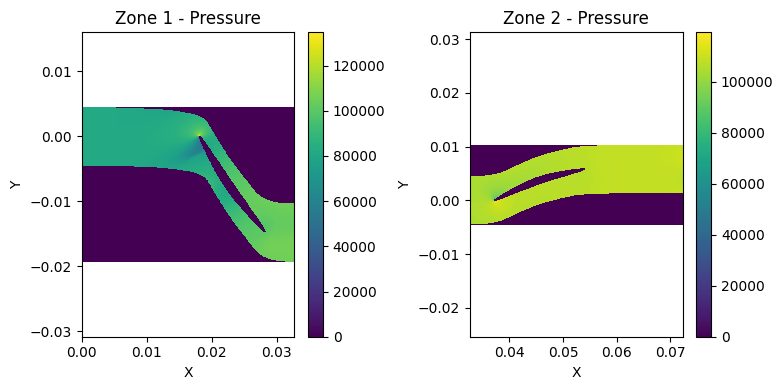

82.98390376

In [2]:
from paraflow import run_simulation, get_flasher, SimulationOptions, get_frames, display_frame
from paraflow.simulation.su2 import Su2SimulationConfig 

flasher = get_flasher("air", "gas")
sim_results = run_simulation(
    axial_turbo_passage,
    params=SimulationOptions(
        inlet_total_state=flasher.flash(P=87909, T=276, mach_number=0.4098), 
        target_outlet_static_state=flasher.flash(P=108932, T=296),
        translation=[
            np.array([0.0, 266, 0.0]),
            None
        ]
    ),
    working_directory="./simulation_out", 
    id="1",
    auto_delete=True,
    verbose=True,
    # num_procs=9,
    cfg=Su2SimulationConfig(
        custom_repo_url= "https://github.com/OpenOrion/SU2",
        version= "7.5.2"
    )
)
sim_results.to_file("./simulation_out/cached.pkl")

# sim_results = SimulationResult.from_file("./simulation_out/cached.pkl")

frames = get_frames(
    sim_results, 
    property_names=["Pressure"], 
    num_pnts=500,
)
display_frame(frames, "Pressure")
sim_results.eval_values.loc[sim_results.eval_values.index[-1], '  "TotTotEff[1]"  ']
